#### Analiza relației dintre energie, emisii și dezvoltare economică

### 1. Contextul analizei

Acest notebook analizează relația dintre consumul de energie, emisiile de CO2 și nivelul de dezvoltare economică, măsurat prin PIB per capita, pentru un grup de țări din Europa Centrală și de Est (Bulgaria, Cehia, Ungaria, Polonia, România și Slovacia), în perioada 2020–2023.

Datele provin din:

- EIA (Energy Information Administration) – indicatori energetici și emisii

- World Development Indicators (WDI) – PIB per capita și acces la electricitate

Unitatea de analiză este țară × an.

### 2. Importul bibliotecilor și al datelor

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.family"] = "DejaVu Sans"


# Citirea setului de date


df = pd.read_csv("03_cleaning_aggregation_student3.csv")


df.head()

,countryRegionId,year,eia_primary_energy_44,eia_energy_intensity_47,eia_co2_emissions_4008,electricity_access,energy_use_per_capita,gdp_per_capita,renewables_share
0,BGR,2020,9.417170,101.126811,35.177193,99.7,2664.551530,10760.211975,21.1
1,BGR,2021,10.829147,111.358190,40.654544,99.8,2918.916414,12966.145754,20.4
2,BGR,2022,11.916742,115.032870,44.326275,100.0,2968.656634,13999.194953,20.4
3,BGR,2023,9.388583,101.609508,33.465186,100.0,2604.191045,15853.208637,20.4
4,CZE,2020,20.962717,147.140623,88.581957,100.0,3764.471612,23472.891545,17.0


### 3. Evoluția PIB-ului per capita (2020–2023)

PIB-ul per capita este utilizat ca indicator standard al nivelului de dezvoltare economică. Graficul de mai jos evidențiază diferențele structurale dintre țări, precum și dinamica acestora în perioada post-pandemică.

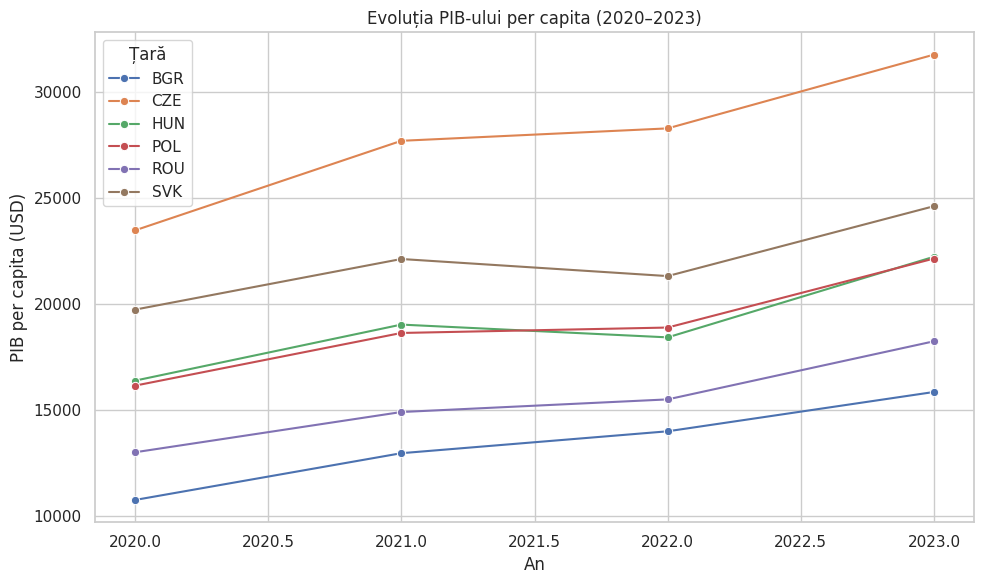

In [2]:
sns.lineplot(
data=df,
x="year",
y="gdp_per_capita",
hue="countryRegionId",
marker="o"
)


plt.title("Evoluția PIB-ului per capita (2020–2023)")
plt.xlabel("An")
plt.ylabel("PIB per capita (USD)")
plt.legend(title="Țară")
plt.tight_layout()
plt.show()

Observație: Se remarcă un nivel constant mai ridicat al PIB-ului per capita în Cehia și Slovacia, comparativ cu România și Bulgaria.

### 4. Relația dintre consumul de energie și PIB per capita

Pentru a evalua legătura dintre utilizarea resurselor energetice și dezvoltarea economică, este analizată relația dintre consumul de energie per capita și PIB-ul per capita.

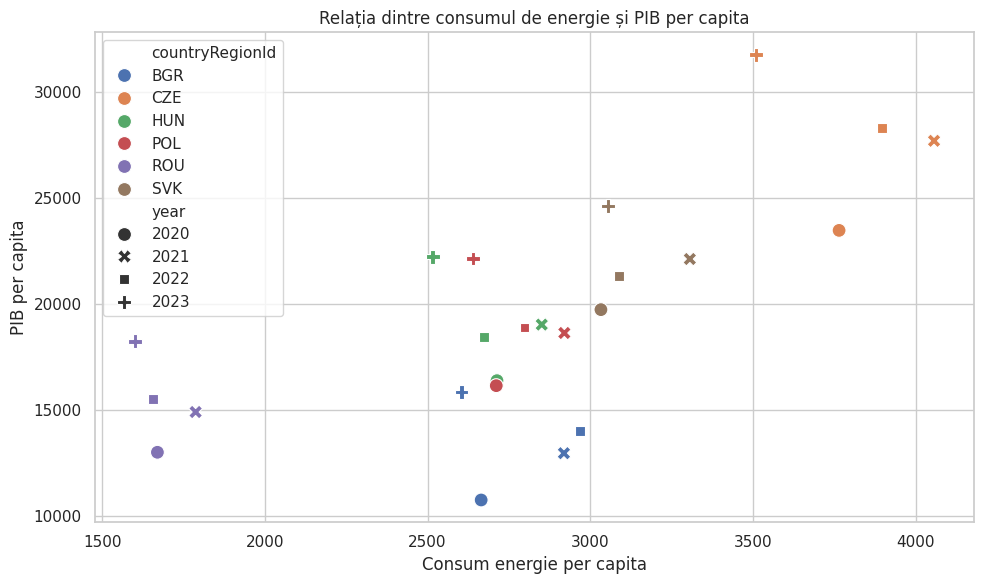

In [4]:
sns.scatterplot(
data=df,
x="energy_use_per_capita",
y="gdp_per_capita",
hue="countryRegionId",
style="year",
s=100
)


plt.title("Relația dintre consumul de energie și PIB per capita")
plt.xlabel("Consum energie per capita")
plt.ylabel("PIB per capita")
plt.tight_layout()
plt.show()

Interpretare: Se observă o asociere pozitivă între cele două variabile, sugerând că un consum energetic mai ridicat este corelat cu un nivel economic mai ridicat.

### 5. Evoluția emisiilor de CO2

Emisiile de CO2 sunt analizate ca indicator al impactului ecologic al activităților economice și energetice.

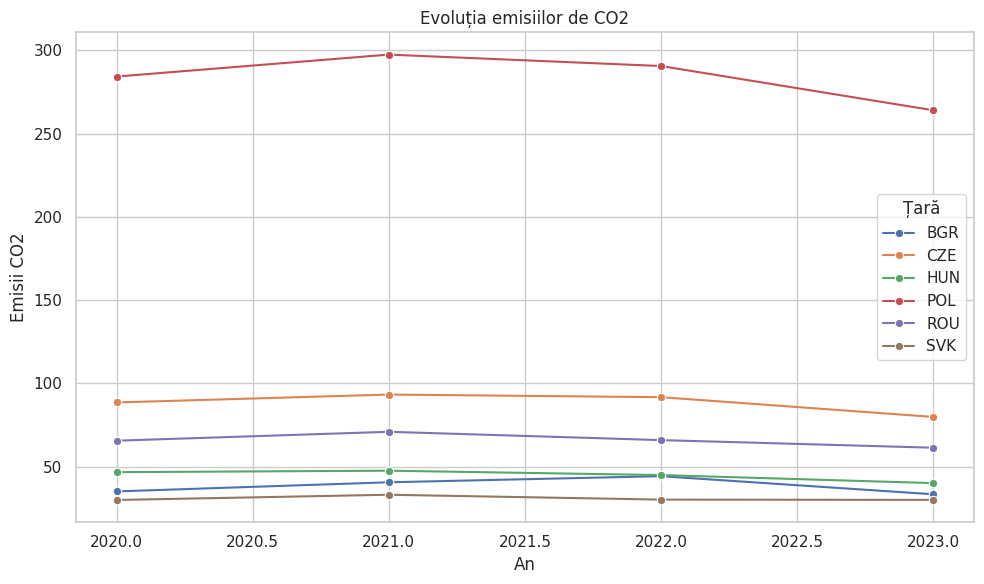

In [5]:
sns.lineplot(
data=df,
x="year",
y="eia_co2_emissions_4008",
hue="countryRegionId",
marker="o"
)


plt.title("Evoluția emisiilor de CO2")
plt.xlabel("An")
plt.ylabel("Emisii CO2")
plt.legend(title="Țară")
plt.tight_layout()
plt.show()

### 6. Ponderea energiilor regenerabile (anul 2023)

Pentru a compara structura mixului energetic, este analizată ponderea energiilor regenerabile în anul 2023.

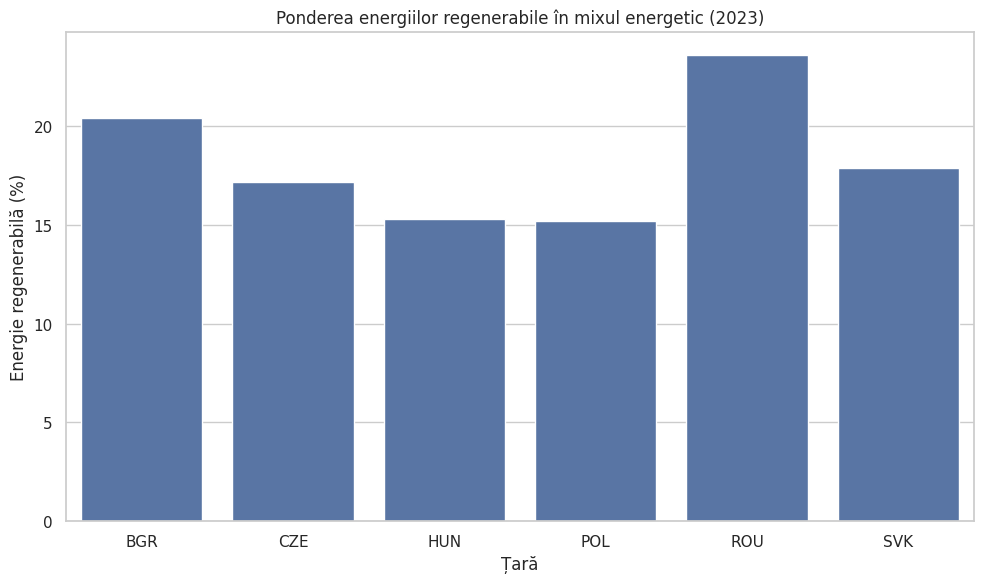

In [6]:
df_2023 = df[df["year"] == 2023]


sns.barplot(
data=df_2023,
x="countryRegionId",
y="renewables_share"
)


plt.title("Ponderea energiilor regenerabile în mixul energetic (2023)")
plt.xlabel("Țară")
plt.ylabel("Energie regenerabilă (%)")
plt.tight_layout()
plt.show()

### 7. Corelația dintre indicatorii energetici și economici

Matricea de corelație permite identificarea relațiilor liniare dintre principalii indicatori utilizați în analiză.

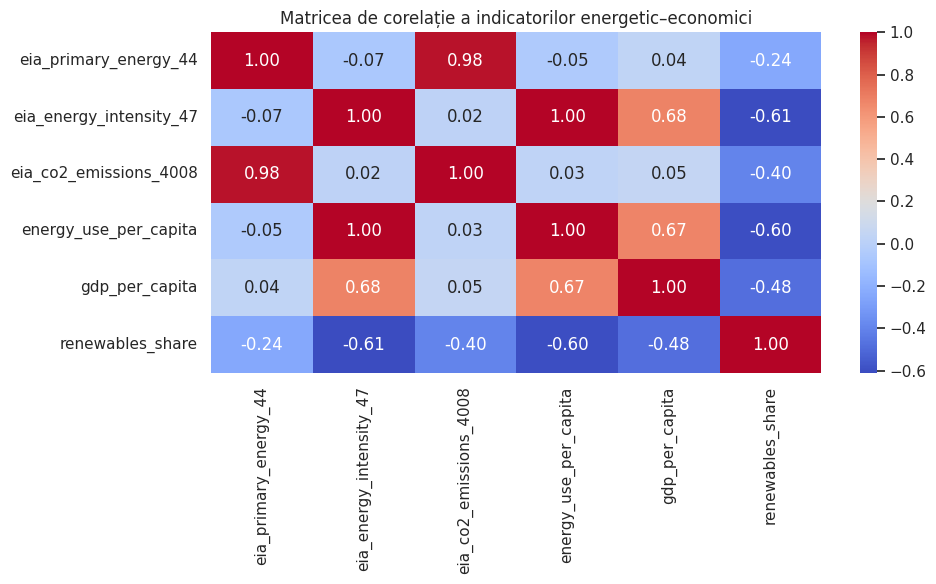

In [7]:
vars_corr = [
"eia_primary_energy_44",
"eia_energy_intensity_47",
"eia_co2_emissions_4008",
"energy_use_per_capita",
"gdp_per_capita",
"renewables_share"
]


corr = df[vars_corr].corr()


sns.heatmap(
corr,
annot=True,
cmap="coolwarm",
fmt=".2f"
)


plt.title("Matricea de corelație a indicatorilor energetic–economici")
plt.tight_layout()
plt.show()

### 8. Statistici descriptive

Pentru a obține o imagine de ansamblu asupra distribuției indicatorilor analizați, sunt calculate statistici descriptive de bază (media, deviația standard, minim și maxim) pentru întregul set de date agregat.

In [8]:
# Statistici descriptive generale


df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,24.0,2021.500000,1.142080,2020.000000,2020.750000,2021.500000,2022.250000,2023.000000
eia_primary_energy_44,24.0,19.642131,15.537011,5.622146,8.591998,16.186203,21.022322,54.070252
eia_energy_intensity_47,24.0,109.374374,26.965860,59.148450,101.488834,110.240158,124.916456,156.946789
eia_co2_emissions_4008,24.0,92.108004,90.058696,30.031405,38.915245,54.516225,89.377512,297.447061
electricity_access,24.0,99.979167,0.072106,99.700000,100.000000,100.000000,100.000000,100.000000
energy_use_per_capita,24.0,2808.228726,658.605187,1600.619423,2630.450656,2824.356771,3063.329723,4056.317001
gdp_per_capita,24.0,19422.820146,5225.139523,10760.211975,15765.794429,18763.361303,22166.606495,31761.594410
renewables_share,24.0,18.312500,3.079993,14.800000,15.300000,17.400000,20.400000,24.100000


Pentru o interpretare mai nuanțată, pot fi analizate și statistici descriptive pe fiecare țară.

In [9]:
# Statistici descriptive pe țări


df.groupby("countryRegionId").describe().round(2)

year                                                          \
                count    mean   std     min      25%     50%      75%     max   
countryRegionId                                                                 
BGR               4.0  2021.5  1.29  2020.0  2020.75  2021.5  2022.25  2023.0   
CZE               4.0  2021.5  1.29  2020.0  2020.75  2021.5  2022.25  2023.0   
HUN               4.0  2021.5  1.29  2020.0  2020.75  2021.5  2022.25  2023.0   
POL               4.0  2021.5  1.29  2020.0  2020.75  2021.5  2022.25  2023.0   
ROU               4.0  2021.5  1.29  2020.0  2020.75  2021.5  2022.25  2023.0   
SVK               4.0  2021.5  1.29  2020.0  2020.75  2021.5  2022.25  2023.0   

                eia_primary_energy_44         ... gdp_per_capita            \
                                count   mean  ...            75%       max   
countryRegionId                               ...                            
BGR                               4.0  10.39  ...       14462.70  15853.21   
CZE                               4.0  21.31  ...       29152.07  31761.59   
HUN                               4.0   8.60  ...       19830.63  22230.63   
POL                               4.0  50.95  ...       19704.73  22145.27   
ROU                               4.0  20.60  ...       16188.77  18244.42   
SVK                               4.0   5.99  ...       22746.22  24614.87   

                renewables_share                                               
                           count   mean   std   min    25%   50%    75%   max  
countryRegionId                                                                
BGR                          4.0  20.58  0.35  20.4  20.40  20.4  20.58  21.1  
CZE                          4.0  17.15  0.10  17.0  17.15  17.2  17.20  17.2  
HUN                          4.0  15.18  0.25  14.8  15.18  15.3  15.30  15.3  
POL                          4.0  15.42  0.45  15.2  15.20  15.2  15.42  16.1  
ROU                          4.0  23.72  0.25  23.6  23.60  23.6  23.72  24.1  
SVK                          4.0  17.82  0.15  17.6  17.82  17.9  17.90  17.9  

[6 rows x 64 columns]

### 9. Distribuția indicatorilor energetici și economici

Analiza distribuțiilor permite identificarea eventualelor asimetrii, valori extreme sau diferențe structurale între observații.

#### 9.1 Distribuția PIB-ului per capita

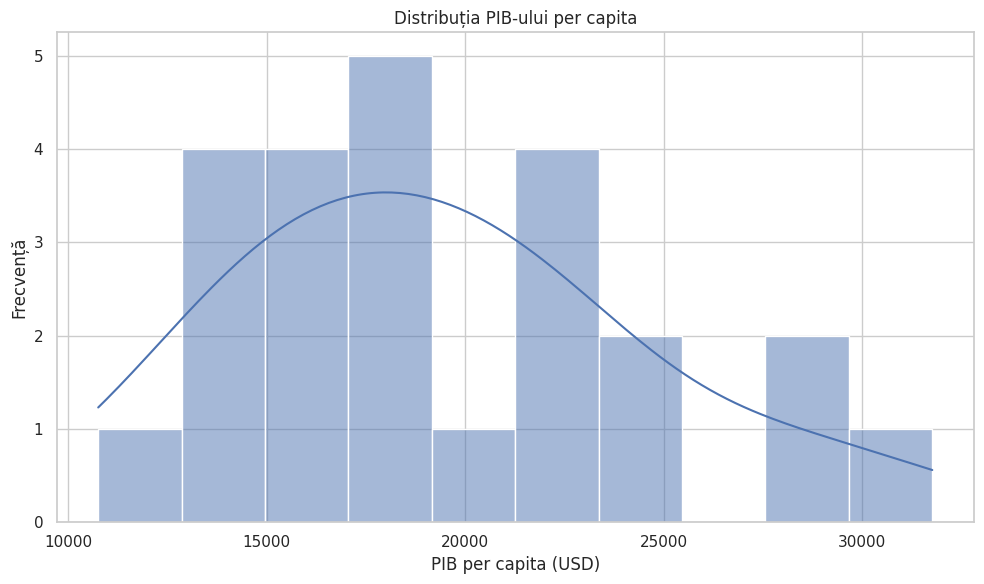

In [10]:
sns.histplot(
data=df,
x="gdp_per_capita",
bins=10,
kde=True
)


plt.title("Distribuția PIB-ului per capita")
plt.xlabel("PIB per capita (USD)")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

#### 9.2 Distribuția consumului de energie per capita

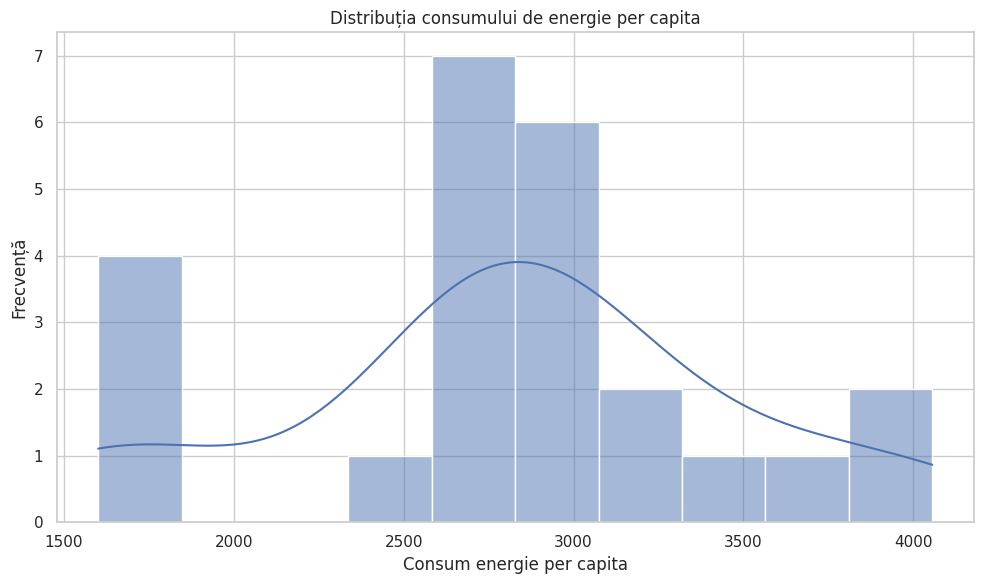

In [11]:
sns.histplot(
data=df,
x="energy_use_per_capita",
bins=10,
kde=True
)


plt.title("Distribuția consumului de energie per capita")
plt.xlabel("Consum energie per capita")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

### 10. Comparații între unitățile de analiză (țări)

Pentru a evidenția diferențele dintre țări, sunt utilizate grafice comparative.

#### 10.1 PIB per capita – comparație între țări (medie 2020–2023)

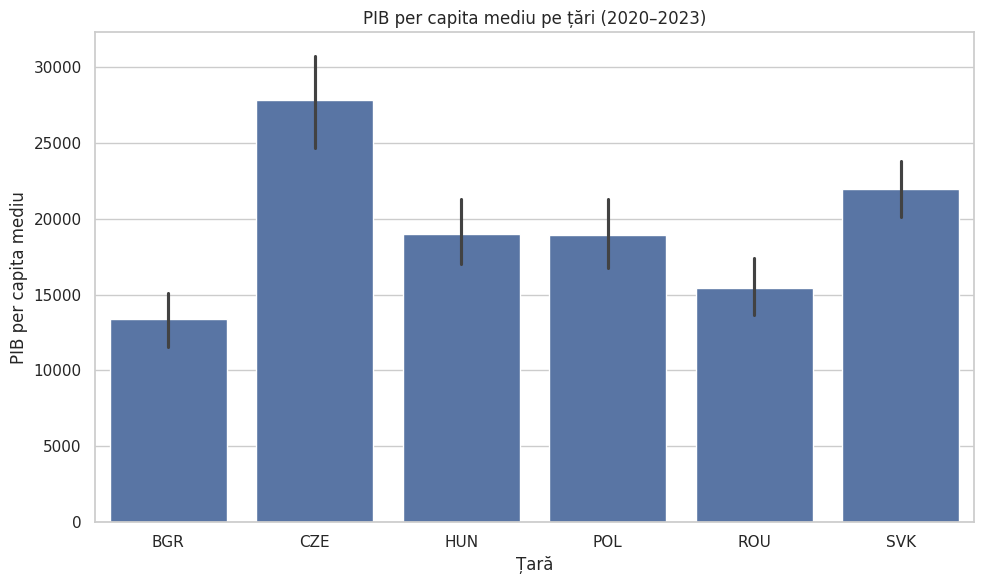

In [12]:
sns.barplot(
data=df,
x="countryRegionId",
y="gdp_per_capita",
estimator="mean"
)


plt.title("PIB per capita mediu pe țări (2020–2023)")
plt.xlabel("Țară")
plt.ylabel("PIB per capita mediu")
plt.tight_layout()
plt.show()

#### 10.2 Intensitatea energetică – comparație între țări

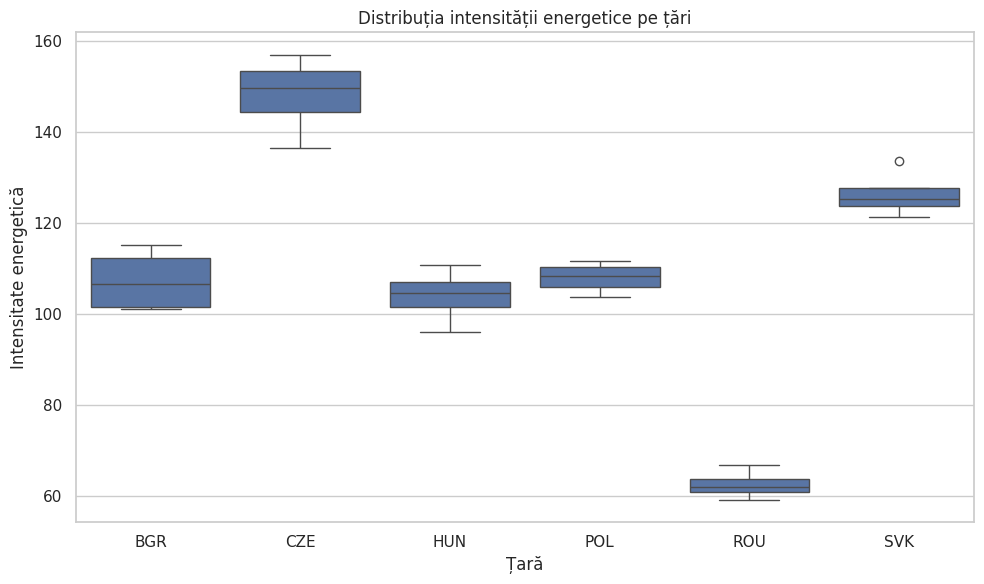

In [13]:
sns.boxplot(
data=df,
x="countryRegionId",
y="eia_energy_intensity_47"
)


plt.title("Distribuția intensității energetice pe țări")
plt.xlabel("Țară")
plt.ylabel("Intensitate energetică")
plt.tight_layout()
plt.show()

### 11. Relațiile dintre indicatorii energetici (EIA) și cei socio-economici (WDI)

Pentru a evidenția relațiile dintre dimensiunea energetică și cea socio-economică, sunt analizate relații bivariate între indicatori cheie.

### 11.1 Emisii de CO2 și PIB per capita

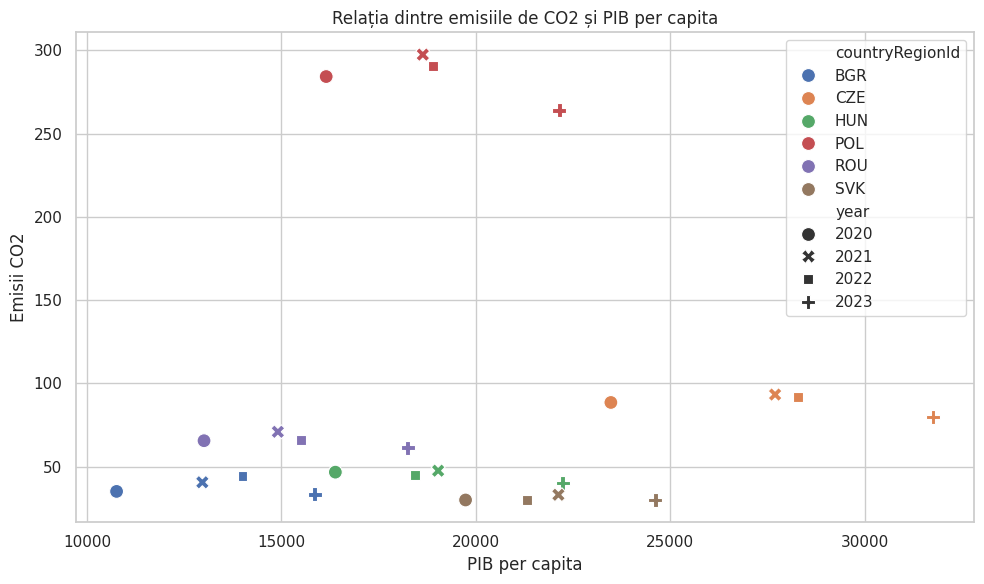

In [14]:
sns.scatterplot(
data=df,
x="gdp_per_capita",
y="eia_co2_emissions_4008",
hue="countryRegionId",
style="year",
s=100
)


plt.title("Relația dintre emisiile de CO2 și PIB per capita")
plt.xlabel("PIB per capita")
plt.ylabel("Emisii CO2")
plt.tight_layout()
plt.show()

#### 11.2 Energie regenerabilă și emisii de CO2

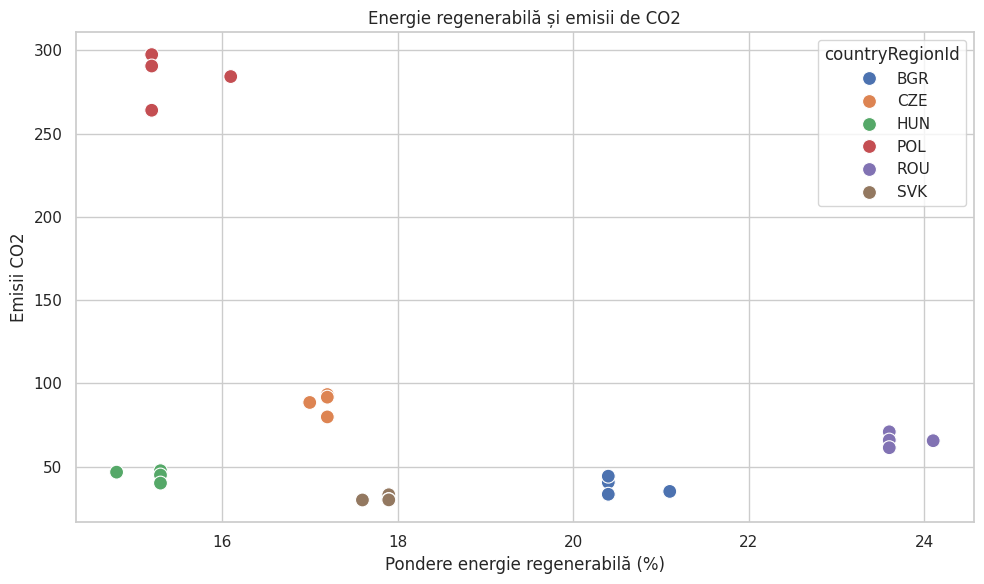

In [15]:
sns.scatterplot(
data=df,
x="renewables_share",
y="eia_co2_emissions_4008",
hue="countryRegionId",
s=100
)


plt.title("Energie regenerabilă și emisii de CO2")
plt.xlabel("Pondere energie regenerabilă (%)")
plt.ylabel("Emisii CO2")
plt.tight_layout()
plt.show()

### 12. Rezultate inițiale și tendințe observate

Analiza exploratorie indică diferențe semnificative între țările analizate atât în ceea ce privește nivelul de dezvoltare economică, cât și structura și eficiența consumului energetic. Se conturează o relație pozitivă între consumul de energie și PIB-ul per capita, precum și o asociere negativă (parțială) între ponderea energiilor regenerabile și nivelul emisiilor de CO2.

Aceste rezultate preliminare oferă baza necesară pentru continuarea analizei prin metode statistice inferențiale.

### 13. Analiză de regresie simplă: energie și dezvoltare economică

Pentru a testa formal relația observată între consumul de energie și nivelul de dezvoltare economică, este estimat un model de regresie liniară simplă, în care variabila dependentă este PIB-ul per capita, iar variabila independentă este consumul de energie per capita.

#### 13.1 Specificația modelului

PIB_it = β0 + β1 · Energie_it + ε_it

unde PIB_it reprezintă PIB-ul per capita în țara i la momentul t, iar Energie_it este consumul de energie per capita.

#### 13.2 Estimarea modelului

In [18]:
import statsmodels.api as sm


X = df[["energy_use_per_capita"]]
X = sm.add_constant(X)


y = df["gdp_per_capita"]


model = sm.OLS(y, X).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         gdp_per_capita   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     18.27
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           0.000309
Time:                        17:45:07   Log-Likelihood:                -231.76
No. Observations:                  24   AIC:                             467.5
Df Residuals:                      22   BIC:                             469.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4416.1454   3602.204      1.226      0.233   -3054.369    1.19e+04
energy_use_per_capita     5.3438      1.250      4.274      0.000       2.751       7.937
==============================================================================
Omnibus:                        0.515   Durbin-Watson:                   1.038
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.050
Skew:                          -0.102   Prob(JB):                        0.975
Kurtosis:                       3.091   Cond. No.                     1.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 13.3 Reprezentare grafică a regresiei

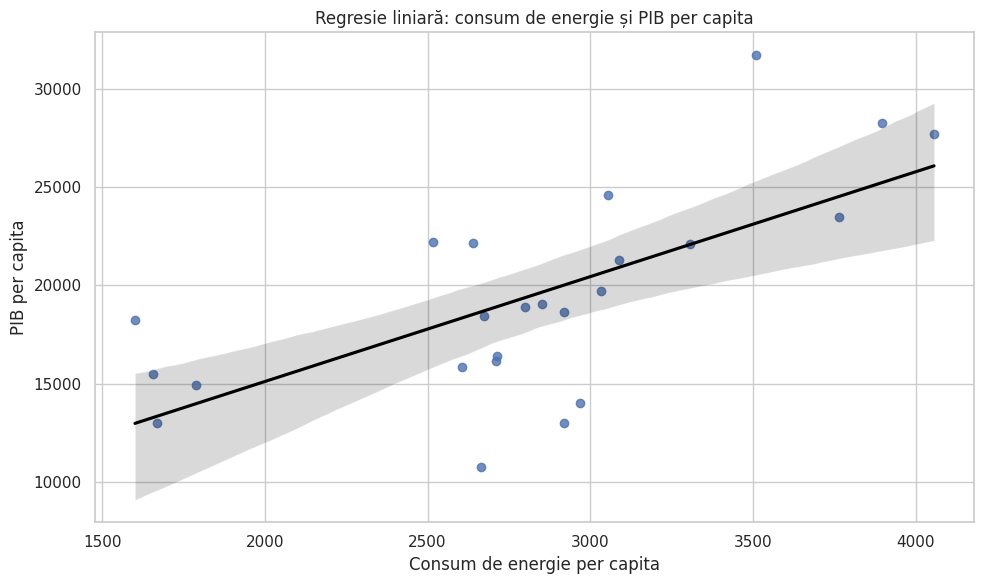

In [20]:
sns.regplot(
data=df,
x="energy_use_per_capita",
y="gdp_per_capita",
ci=95,
line_kws={"color": "black"}
)


plt.title("Regresie liniară: consum de energie și PIB per capita")
plt.xlabel("Consum de energie per capita")
plt.ylabel("PIB per capita")
plt.tight_layout()
plt.show()

#### 13.4 Interpretare preliminară

Coeficientul estimat pentru consumul de energie per capita este pozitiv și statistic semnificativ, sugerând că un nivel mai ridicat al consumului energetic este asociat cu un PIB per capita mai mare. Valoarea R2 indică faptul că o parte relevantă din variația PIB-ului per capita este explicată de variația consumului de energie.

Această analiză constituie un prim pas și poate fi extinsă ulterior către modele de regresie multiplă sau modele panel.

Analiza exploratorie indică diferențe semnificative între țările analizate atât în ceea ce privește nivelul de dezvoltare economică, cât și structura și eficiența consumului energetic. Se conturează o relație pozitivă între consumul de energie și PIB-ul per capita, precum și o asociere negativă (parțială) între ponderea energiilor regenerabile și nivelul emisiilor de CO2.

Aceste rezultate preliminare oferă baza necesară pentru continuarea analizei prin metode statistice inferențiale, precum regresii liniare sau modele panel, care vor permite testarea riguroasă a relațiilor observate.